In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import proplot

# # Plotting parameters, proplot uisage is optional, but adds nice aesthetics:
# proplot.rc['figure.facecolor'] = 'white'
# proplot.rc.update(
#     linewidth=1, fontsize=9,
#     color='dark blue', suptitlecolor='dark blue',
#     titleloc='upper center', titlecolor='dark blue', titleborder=False,
# )

# mpl.rcParams['font.sans-serif'] = "Arial" # Set the font
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['grid.alpha'] = 0 # Remove the grid
mpl.rcParams['xtick.major.bottom'] = True # Remove minor ticks
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['xtick.minor.bottom'] = True # Remove minor ticks
mpl.rcParams['ytick.minor.left'] = True
mpl.rcParams['ytick.minor.right'] = False
mpl.rcParams['axes.spines.right'] = False # switch off top and right spines
mpl.rcParams['axes.spines.top'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import glob
%matplotlib inline

### Parse benchmark outputs

In [65]:
benchmark_outputs = glob.glob("./benchmarks*/*gpu*")
len(benchmark_outputs)

48

In [82]:
benchmark_table = []
for output in benchmark_outputs:
    
    fname = output.split('/')[-1]
    test = fname.split('.')[1]
    n_beads = fname.split('.')[2]
    machine = fname.split('.')[3]
    mode_compaction = fname.split('.')[4]
    backend = fname.split('.')[5]
    
    df = pd.read_table(output)
    
    df.loc[:, 'test_name'] = test
    df.loc[:, 'n_beads'] = int(n_beads)
    df.loc[:, 'machine'] = machine
    df.loc[:, 'mode_compaction'] = mode_compaction
    df.loc[:, 'backend'] = backend
    
    benchmark_table.append(df.copy())
    del df

In [83]:
benchmark_table = pd.concat(benchmark_table).sort_values('n_beads')

In [84]:
len(benchmark_table)

216

In [93]:
benchmark_table.tail(10)

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,test_name,n_beads,machine,mode_compaction,backend,GPU type
0,4479.4441,1:14:39,2863.57,38830.48,2790.43,2808.01,0.0,2319.43,99.84,4472.77,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm,Tesla V100-SXM2-16GB
4,4385.8531,1:13:05,8221.52,35146.13,8075.80,8130.31,0.0,48883.15,99.42,4386.74,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-no-writing,Tesla V100-SXM2-16GB
3,4567.9473,1:16:07,3651.55,39619.18,3588.39,3600.60,0.0,9270.02,99.89,4572.95,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm,Tesla V100-SXM2-16GB
4,4511.6514,1:15:11,2486.95,38456.21,2423.96,2436.17,0.0,11585.95,99.78,4515.60,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm,Tesla V100-SXM2-16GB
0,4293.2083,1:11:33,8223.21,35147.14,8077.68,8132.00,0.0,9698.57,99.47,4271.86,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-no-writing,Tesla V100-SXM2-16GB
1,4347.0761,1:12:27,8220.25,35146.14,8079.75,8131.97,0.0,19524.05,99.64,4338.80,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-no-writing,Tesla V100-SXM2-16GB
2,4268.9151,1:11:08,8222.05,36138.14,8072.30,8129.32,0.0,29290.90,99.34,4254.56,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-no-writing,Tesla V100-SXM2-16GB
3,4420.1093,1:13:40,8222.48,35148.14,8077.41,8131.66,0.0,39087.02,99.31,4409.45,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-no-writing,Tesla V100-SXM2-16GB
1,4583.5453,1:16:23,3998.70,39968.18,3937.04,3949.22,0.0,4637.46,100.20,4596.22,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm,Tesla V100-SXM2-16GB
2,4534.0743,1:15:34,2920.62,38895.20,2857.12,2869.50,0.0,6954.26,99.96,4539.12,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm,Tesla V100-SXM2-16GB


In [87]:
benchmark_table.loc[:, 'n_beads'] = benchmark_table.n_beads.astype(int)

In [88]:
np.unique( benchmark_table.machine )

array(['ip-172-31-34-148'], dtype=object)

In [89]:
benchmark_table.loc[:, "GPU type"] = benchmark_table.machine.map({
    'ip-172-31-34-148': 'Tesla V100-SXM2-16GB',
})

In [90]:
machines_order = ['ip-172-31-34-148']

In [91]:
n_beads_order = [1000, 4000, 10000, 40000, 80000, 200000, 240000, 320000, 400000, 640000]

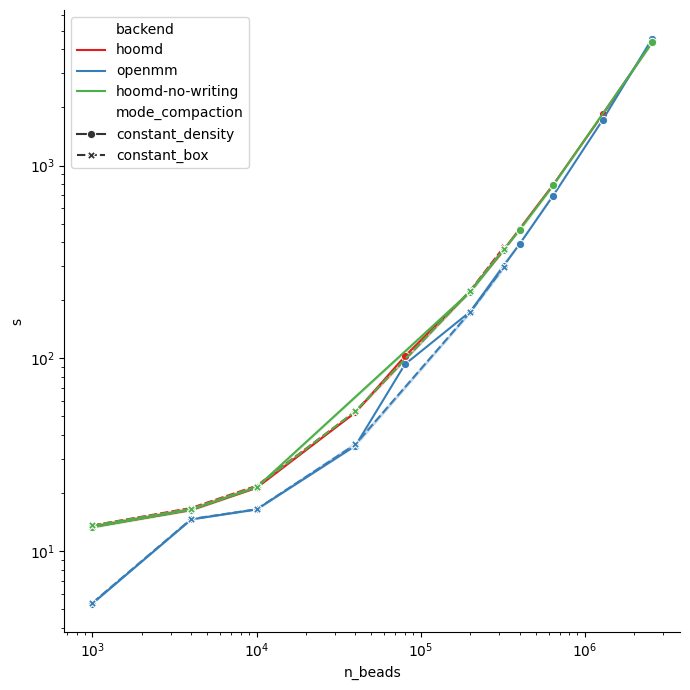

In [92]:
# Total runtime

plt.figure(figsize=[7, 7])
sns.lineplot(
    data=benchmark_table, 
            x='n_beads', y='s',
            hue='backend', 
            style='mode_compaction',
            markers=True, 
            palette='Set1',
            )

plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

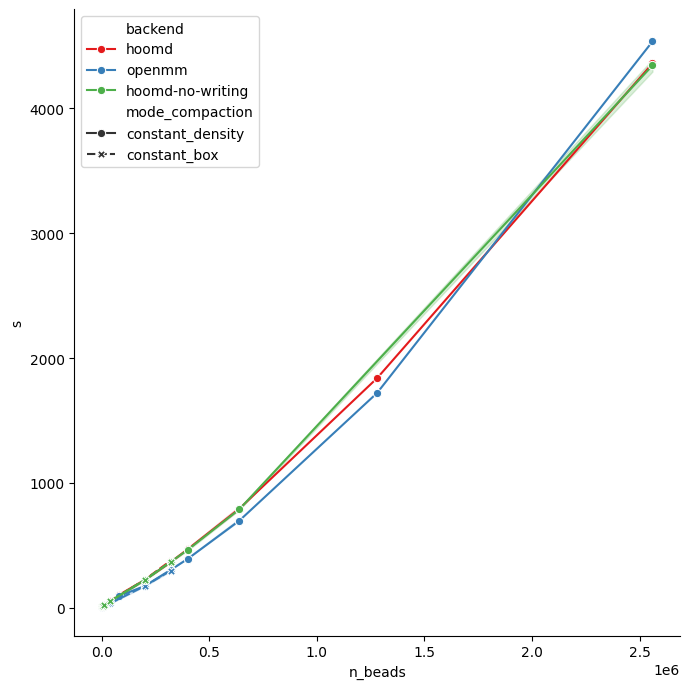

In [94]:
# Total runtime

plt.figure(figsize=[7, 7])
sns.lineplot(
    data=benchmark_table, 
            x='n_beads', y='s', 
            hue='backend', 
            style='mode_compaction',
            markers=True, marker="o",
            palette='Set1',
            )

# plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()